# Tara's Open Data Project 

This project aims to study the correlation between one's gender and one's health. 

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [16]:
%matplotlib inline

Seting the size of the plots that will come out.(Numbers in inches)

In [17]:
plt.rcParams['figure.figsize'] = (10, 5)

In [18]:
saved_style_state = matplotlib.rcParams.copy() #a style state to go back to

Downloading the dataset

In [33]:
if os.path.isfile("Gender_StatsData.csv"):
    filepath = "Gender_StatsData.csv"
    print("loading from file")
    
else:
    filepath = "https://databank.worldbank.org/data/download/Gender_Stats_csv.zip"
    print("loading from the internet")

gender_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [20]:
gender_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,A woman can apply for a passport in the same w...,SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,A woman can be head of household in the same w...,SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,A woman can choose where to live in the same w...,SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,A woman can obtain a judgment of divorce in th...,SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A list of the coloumns in the dataset

In [21]:
gender_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

Using the iloc property to index a row as a series 

In [23]:
row_zero = gender_data.iloc[0]
row_zero

Country Name                            Africa Eastern and Southern
Country Code                                                    AFE
Indicator Name    A woman can apply for a passport in the same w...
Indicator Code                                       SG.APL.PSPT.EQ
1960                                                            NaN
                                        ...                        
2017                                                            NaN
2018                                                            NaN
2019                                                            NaN
2020                                                            NaN
Unnamed: 65                                                     NaN
Name: 0, Length: 66, dtype: object

Below is a list of health related indicators which were selected from the entire list of indicators. 

In [163]:
health_ind = ["Cause of death, by injury (% of total)", "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)", "Incidence of HIV, ages 15-24, female (per 1,000 uninfected female population ages 15-24)", "Incidence of HIV, ages 15-24, male (per 1,000 uninfected male population ages 15-24)", "Life expectancy at birth, female (years)", "Life expectancy at birth, male (years)", "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)", "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)", "Mortality rate, infant, female (per 1,000 live births)", "Mortality rate, infant, male (per 1,000 live births)", "Prevalence of HIV, female (% ages 15-24)", "Prevalence of HIV, male (% ages 15-24)", "Prevalence of obesity, female (% of female population ages 18+)", "Prevalence of obesity, male (% of male population ages 18+)", "Prevalence of underweight, weight for age, female (% of children under 5)", "Prevalence of underweight, weight for age, male (% of children under 5)", "Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)", "Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)", "Women participating in own health care decisions (% of women age 15-49)", "Access to anti-retroviral drugs, female (%)", "Access to anti-retroviral drugs, male (%)", "Human Capital Index (HCI), Female (scale 0-1)", "Human Capital Index (HCI), Male (scale 0-1)"]

In [164]:
print(health_ind)

['Cause of death, by injury (% of total)', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Incidence of HIV, ages 15-24, female (per 1,000 uninfected female population ages 15-24)', 'Incidence of HIV, ages 15-24, male (per 1,000 uninfected male population ages 15-24)', 'Life expectancy at birth, female (years)', 'Life expectancy at birth, male (years)', 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)', 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)', 'Mortality rate, infant, female (per 1,000 live births)', 'Mortality rate, infant, male (per 1,000 live births)', 'Prevalence of HIV, female (% ages 15-24)', 'Prevalence of HIV, male (% ages 15-24)', 'Prevalence of obesity, female (% of female population ages 18+)', 'Prevalence of obesity, male (% of male population ages 18+)', 'Prevalence of underweight, weight for age, female (% of children under 5)', 'Prev

In [145]:
import re

for indicator in health_ind:
    male = re.findall(' male', indicator)
    female = re.findall('female', indicator)
    if male:
        male_ind = gender_data.loc[gender_data["Indicator Name"] == indicator]

    if female:
        female_ind = gender_data.loc[gender_data["Indicator Name"] == indicator]

        
print(male_ind.loc[(gender_data['Country Name'] == "Africa Eastern and Southern") &
                   (gender_data["Indicator Name"] == 'Access to anti-retroviral drugs, male (%)')])

                   Country Name Country Code  \
15  Africa Eastern and Southern          AFE   

                               Indicator Name     Indicator Code  1960  1961  \
15  Access to anti-retroviral drugs, male (%)  SH.HIV.ARTC.MA.ZS   NaN   NaN   

    1962  1963  1964  1965  ...       2012       2013       2014       2015  \
15   NaN   NaN   NaN   NaN  ...  33.174041  37.913291  42.173782  46.514059   

         2016       2017       2018       2019  2020  Unnamed: 65  
15  51.266749  56.305388  59.250879  64.815162   NaN          NaN  

[1 rows x 66 columns]


In [146]:

def extract_data(df, indicator_name):
    test_row = df.loc[(gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, 'Access to anti-retroviral drugs, male (%)')

my_data_female = extract_data(gender_data, 'Access to anti-retroviral drugs, female (%)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)


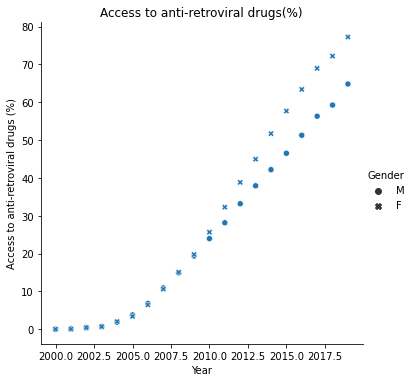

In [147]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Access to anti-retroviral drugs(%)')
ax.set(xlabel='Year', ylabel='Access to anti-retroviral drugs (%)')

plt.show()
        

In [148]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "Low income", 'Access to anti-retroviral drugs, male (%)')

my_data_female = extract_data(gender_data, "Low income", 'Access to anti-retroviral drugs, female (%)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



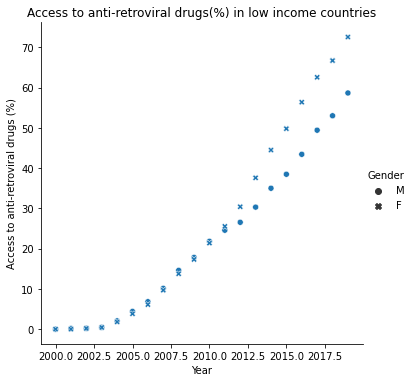

In [149]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Access to anti-retroviral drugs(%) in low income countries')
ax.set(xlabel='Year', ylabel='Access to anti-retroviral drugs (%)')

plt.show()
        

In [150]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "World", 'Prevalence of overweight, male (% of male adults)')

my_data_female = extract_data(gender_data, "World", 'Prevalence of overweight, female (% of female adults)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



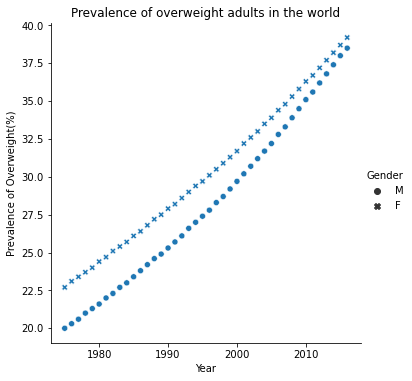

In [151]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Prevalence of overweight adults in the world')
ax.set(xlabel='Year', ylabel='Prevalence of Overweight(%)')

plt.show()
        

In [152]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "Low income", 'Prevalence of overweight, male (% of male adults)')

my_data_female = extract_data(gender_data, "Low income", 'Prevalence of overweight, female (% of female adults)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



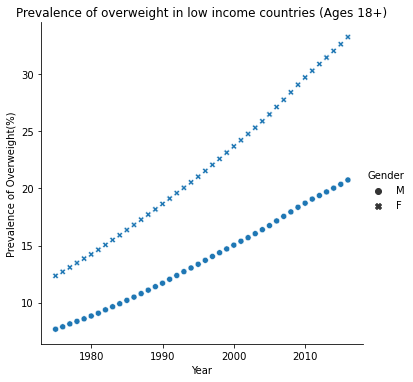

In [153]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Prevalence of overweight in low income countries (Ages 18+)')
ax.set(xlabel='Year', ylabel='Prevalence of Overweight(%)')

plt.show()
        

In [154]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "World", 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)')

my_data_female = extract_data(gender_data, "World", 'Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



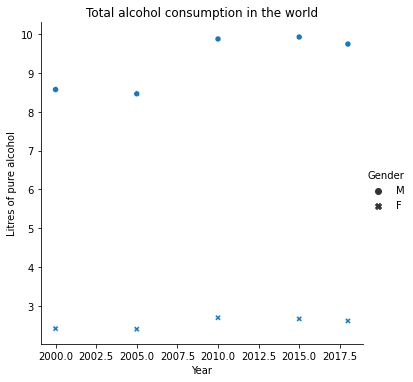

In [155]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Total alcohol consumption in the world')
ax.set(xlabel='Year', ylabel='Litres of pure alcohol')

plt.show()
        

In [156]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "Low income", 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)')

my_data_female = extract_data(gender_data, "Low income", 'Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



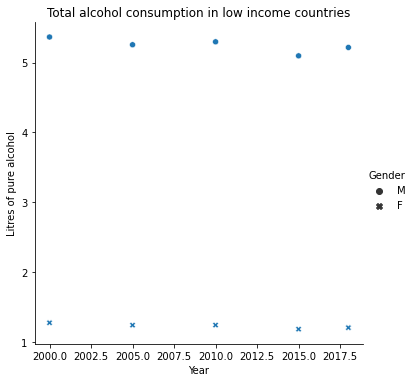

In [157]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Total alcohol consumption in low income countries')
ax.set(xlabel='Year', ylabel='Litres of pure alcohol')

plt.show()
        

In [158]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "World", 'Mortality rate, infant, male (per 1,000 live births)')

my_data_female = extract_data(gender_data, "World", 'Mortality rate, infant, female (per 1,000 live births)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



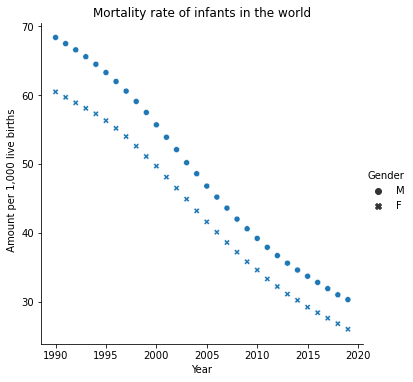

In [159]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Mortality rate of infants in the world')
ax.set(xlabel='Year', ylabel='  Amount per 1,000 live births')

plt.show()
        

In [160]:

def extract_data(df, country_name, indicator_name):
    test_row = df.loc[(gender_data['Country Name'] == country_name) &
                  (gender_data["Indicator Name"] == indicator_name)]
    year_list = []
    data_list = []
    country_list = []
    indicator_list = []
    gender_list = []
    male = re.findall(' male', indicator_name)
    female = re.findall('female', indicator_name)
    for i in range(1960, 2021):
        year_list.append(i)
        data_list.append(test_row[str(i)].values[0])
        country_list.append(country_name)
        indicator_list.append(indicator_name)
        if male:
            gender_list.append('M')
        if female:
            gender_list.append('F')
    new_df = pd.DataFrame({'Country Name': country_list, 'Indicator Name': indicator_list, 'Year': year_list, 'Data': data_list, 'Gender': gender_list})

    return new_df

my_data_male = extract_data(gender_data, "Low income", 'Mortality rate, infant, male (per 1,000 live births)')

my_data_female = extract_data(gender_data, "Low income", 'Mortality rate, infant, female (per 1,000 live births)')

frames = [my_data_male, my_data_female]

result = pd.concat(frames)



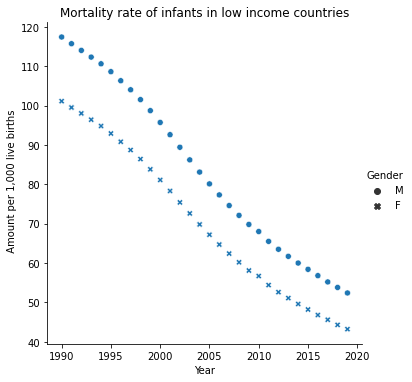

In [161]:

ax = sns.relplot(x='Year', y='Data', data=result, kind='scatter', style='Gender').set(title= 'Mortality rate of infants in low income countries')
ax.set(xlabel='Year', ylabel='  Amount per 1,000 live births')

plt.show()
        

In [169]:
pip install RISE


     |████████████████████████████████| 4.3 MB 1.3 MB/s 
Note: you may need to restart the kernel to use updated packages.
